# Summary

----

# Imports

In [1]:
%run imports.ipynb

2016-09-21 13:21:14.708211


In [2]:
%run db.ipynb

MySQL database already running...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-09-21 13:21:14.876705


In [3]:
import kmtools.jupyter_tools
print_sql = kmtools.jupyter_tools.print_sql

In [4]:
NOTEBOOK_NAME = 'elaspic_statistics'
os.makedirs(NOTEBOOK_NAME, exist_ok=True)

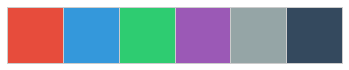

In [5]:
flatui = ["#e74c3c", "#3498db", "#2ecc71", "#9b59b6",  "#95a5a6", "#34495e"]
sns.palplot(flatui)

# **Calculated**

In [6]:
comment_in_splice_variants = ''  # {'', '--'}
comment_in_trembl = ''  # {'', '--'}

## PROTEIN: missing domain or template

In [7]:
# Number of human proteins in `uniprot_kb`
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_id) uniprots_total
FROM uniprot_kb.uniprot_sequence
WHERE organism_name = 'Homo sapiens'
{0} AND uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
# 20270;
""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
uniprots_total = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(uniprots_total)

20270


In [8]:
# Number of human proteins in `elaspic`
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_id) uniprots_with_pfam
FROM uniprot_kb.uniprot_sequence
JOIN elaspic.uniprot_domain d USING (uniprot_id)
WHERE organism_name = 'Homo sapiens'
{0} AND uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
# 18355;
""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
uniprots_with_pfam = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(uniprots_with_pfam)  

18355


In [9]:
# Number of human proteins in `elaspic` with templates
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_id) uniprots_with_template
FROM uniprot_kb.uniprot_sequence
JOIN elaspic.uniprot_domain d USING (uniprot_id)
JOIN elaspic.uniprot_domain_template USING (uniprot_domain_id)
WHERE organism_name = 'Homo sapiens'
{0} AND uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
# 14015;
""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
uniprots_with_template = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(uniprots_with_template)

14015


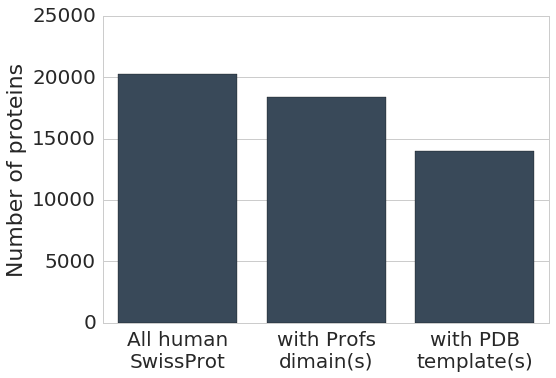

In [10]:
# Plot
fg, ax = plt.subplots()
sns.barplot(
    x=['All human\nSwissProt', 'with Profs\ndimain(s)', 'with PDB\ntemplate(s)'],
    y=[uniprots_total, uniprots_with_pfam, uniprots_with_template],
    color=flatui[5],
    ax=ax,
)
ax.set_ylabel('Number of proteins')
plt.savefig(op.join(NOTEBOOK_NAME, 'missing_template.pdf'), bbox_inches='tight')
plt.savefig(op.join(NOTEBOOK_NAME, 'missing_template.png'), dpi=150, bbox_inches='tight')

In [11]:
uniprots_total, uniprots_with_pfam, uniprots_with_template

(20270, 18355, 14015)

## PROTEIN: missing Provean

In [12]:
# Have Provean
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_id) uniprots_with_provean
FROM uniprot_kb.uniprot_sequence
JOIN elaspic.uniprot_domain d USING (uniprot_id)
JOIN elaspic.uniprot_domain_template USING (uniprot_domain_id)
LEFT JOIN elaspic.provean USING (uniprot_id)
WHERE organism_name = 'Homo sapiens'
{0} AND uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
AND provean_supset_filename IS NOT NULL
# 14015;
""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
uniprots_with_provean = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(uniprots_with_provean)

14015


In [13]:
# Missing Provean
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_id) uniprots_without_provean
FROM uniprot_kb.uniprot_sequence
JOIN elaspic.uniprot_domain d USING (uniprot_id)
JOIN elaspic.uniprot_domain_template USING (uniprot_domain_id)
LEFT JOIN elaspic.provean USING (uniprot_id)
WHERE organism_name = 'Homo sapiens'
{0} AND uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
AND provean_supset_filename IS NULL
# 0
""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
uniprots_without_provean = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(uniprots_without_provean)

0


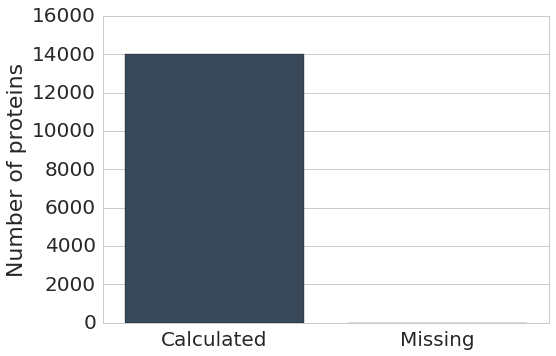

In [14]:
# Plot
fg, ax = plt.subplots()
sns.barplot(
    x=['Calculated', 'Missing'],
    y=[uniprots_with_provean, uniprots_without_provean],
    color=flatui[5],
    ax=ax,
)
ax.set_ylabel('Number of proteins')
plt.savefig(op.join(NOTEBOOK_NAME, 'missing_provean.pdf'), bbox_inches='tight')
plt.savefig(op.join(NOTEBOOK_NAME, 'missing_provean.png'), dpi=150, bbox_inches='tight')

## PROTEIN: missing at least one model 

In [15]:
# Number of uniprots with at least one model
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_id) uniprots_with_model
FROM uniprot_kb.uniprot_sequence
JOIN elaspic.uniprot_domain d USING (uniprot_id)
JOIN elaspic.uniprot_domain_template USING (uniprot_domain_id)
LEFT JOIN elaspic.uniprot_domain_model USING (uniprot_domain_id)
WHERE organism_name = 'Homo sapiens'
{0} AND uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
AND model_filename IS NOT NULL;
# 13781;
""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
uniprots_with_model = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(uniprots_with_model)

13796


6474


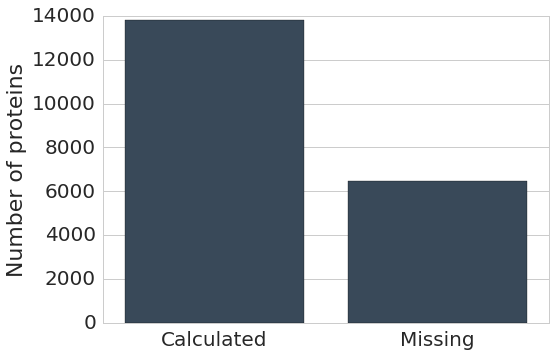

In [16]:
# Plot
uniprots_without_model = uniprots_total - uniprots_with_model
print(uniprots_without_model)

fg, ax = plt.subplots()
sns.barplot(
    x=['Calculated', 'Missing'],
    y=[uniprots_with_model, uniprots_without_model],
    color=flatui[5],
    ax=ax,
)
ax.set_ylabel('Number of proteins')
plt.savefig(op.join(NOTEBOOK_NAME, 'missing_model_protein.pdf'), bbox_inches='tight')
plt.savefig(op.join(NOTEBOOK_NAME, 'missing_model_protein.png'), dpi=150, bbox_inches='tight')

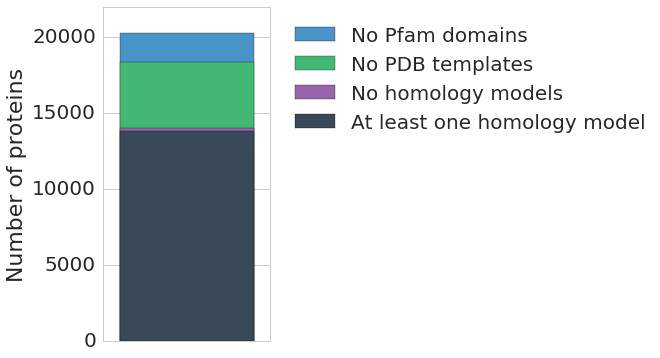

In [17]:
# Plot
fg, ax = plt.subplots(figsize=(3, 6))
ax.set_ylabel('Number of proteins')
sns.barplot(y=[uniprots_total], color=flatui[1], label='No Pfam domains')
sns.barplot(y=[uniprots_with_pfam], color=flatui[2], label='No PDB templates')
sns.barplot(y=[uniprots_with_template], color=flatui[3], label='No homology models')
sns.barplot(y=[uniprots_with_model], color=flatui[5], label='At least one homology model')
plt.ylim(0, 22000)
plt.legend(loc=(1.1, 0.6), ncol=1)
plt.savefig(op.join(NOTEBOOK_NAME, 'protein_statistics.pdf'), bbox_inches='tight')
plt.savefig(op.join(NOTEBOOK_NAME, 'protein_statistics.png'), dpi=150, bbox_inches='tight')

## PROTEIN: homology model coverage

In [18]:
# Proteins with homology models
db_remote.engine.execute("SET SQL_MODE = ''")
db_remote.engine.execute("SET SESSION group_concat_max_len = 10000000;")
sql_query = """
select 
uniprot_id, 
char_length(uniprot_sequence) uniprot_length, 
group_concat(model_domain_def) domain_defs
from elaspic.uniprot_domain
join uniprot_kb.uniprot_sequence using (uniprot_id)
join elaspic.uniprot_domain_model using (uniprot_domain_id)
where organism_name = 'Homo sapiens'
{0} and uniprot_id not like '%%-%%'
{1} and db = 'sp'
and model_domain_def is not null
group by uniprot_id
# 13824;""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
df = pd.read_sql_query(sql_query, db_remote.engine)
print(len(df))

/home/kimlab1/strokach/anaconda/lib/python3.5/site-packages/sqlalchemy/engine/default.py:450: Warning: Changing sql mode 'NO_AUTO_CREATE_USER' is deprecated. It will be removed in a future release.
  cursor.execute(statement, parameters)


13837


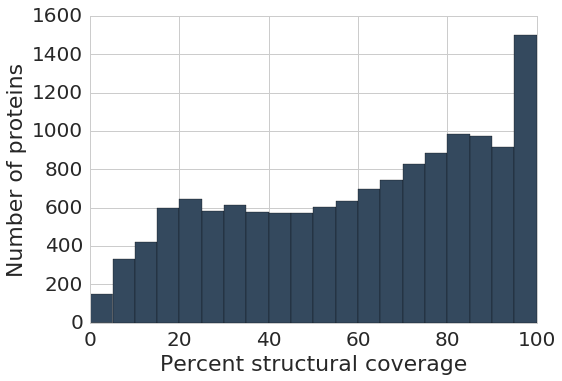

In [19]:
# Plot
def get_coverage(domain_defs):
    domain_cov = set()
    for domain_def in domain_defs.split(','):
        start, end = [int(x) for x in domain_def.split(':')]
        domain_cov.update(range(start, end+1))
    return domain_cov

assert get_coverage('1:10') == set(range(1,11))
assert get_coverage('1:10,11:100') == set(range(1,101))
assert get_coverage('1:10,91:100') == set(range(1,11)) | set(range(91,101))

df['num_domains'] = df['domain_defs'].str.count(',') + 1
df['structural_coverage'] = df['domain_defs'].apply(get_coverage)
df['coverage_length'] = df['structural_coverage'].apply(len)
df['coverage_percent'] = df['coverage_length'] / df['uniprot_length'] * 100

fg, ax = plt.subplots()
df['coverage_percent'].hist(range=(0,100), bins=20, color=flatui[5], ax=ax)
ax.set_xlabel('Percent structural coverage')
ax.set_ylabel('Number of proteins')
plt.savefig(op.join(NOTEBOOK_NAME, 'structural_coverage_hist.pdf'), bbox_inches='tight')
plt.savefig(op.join(NOTEBOOK_NAME, 'structural_coverage_hist.png'), dpi=150, bbox_inches='tight')
plt.show()

## DOMAIN: missing model

In [20]:
# Domains with models
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_domain_id) domains_with_models
FROM elaspic.uniprot_domain d
JOIN uniprot_kb.uniprot_sequence USING (uniprot_id)
LEFT JOIN elaspic.uniprot_domain_model USING (uniprot_domain_id)
WHERE organism_name = 'Homo sapiens'
{0} AND uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
AND model_filename IS NOT NULL;
# 29171""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
domains_with_models = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(domains_with_models)

29201


In [21]:
# Domains without models
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_domain_id) domains_without_models
FROM elaspic.uniprot_domain d
JOIN uniprot_kb.uniprot_sequence USING (uniprot_id)
LEFT JOIN elaspic.uniprot_domain_model USING (uniprot_domain_id)
WHERE organism_name = 'Homo sapiens'
{0} AND uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
AND model_filename IS NULL;
# 9072""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
domains_without_models = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(domains_without_models)

9042


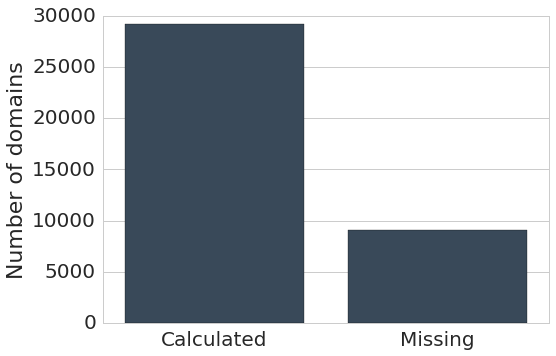

In [22]:
# Plot
fg, ax = plt.subplots()
sns.barplot(
    x=['Calculated', 'Missing'],
    y=[domains_with_models, domains_without_models],
    color=flatui[5],
    ax=ax,
)
ax.set_ylabel('Number of domains')
plt.savefig(op.join(NOTEBOOK_NAME, 'missing_model_domain.pdf'), bbox_inches='tight')
plt.savefig(op.join(NOTEBOOK_NAME, 'missing_model_domain.png'), dpi=150, bbox_inches='tight')

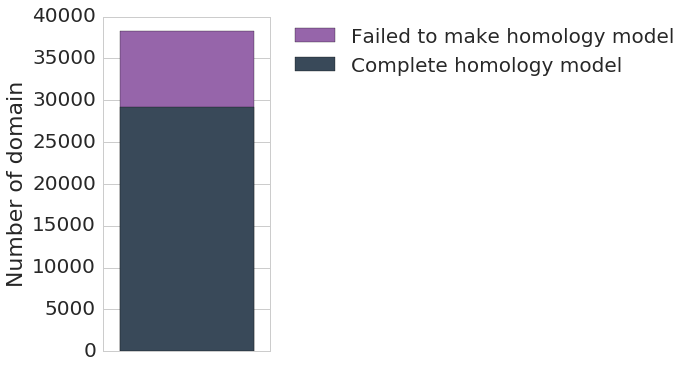

In [23]:
# Plot
fg, ax = plt.subplots(figsize=(3, 6))
ax.set_ylabel('Number of domain')
sns.barplot(
    y=[domains_with_models + domains_without_models], 
    color=flatui[3], 
    label='Failed to make homology model')
sns.barplot(
    y=[domains_with_models], 
    color=flatui[5], 
    label='Complete homology model')
# plt.ylim(0, 22000)
plt.legend(loc=(1.1, 0.8), ncol=1)
plt.savefig(op.join(NOTEBOOK_NAME, 'domain_statistics.pdf'), bbox_inches='tight')
plt.savefig(op.join(NOTEBOOK_NAME, 'domain_statistics.png'), dpi=150, bbox_inches='tight')

## PROTEIN PAIR: missing model

In [24]:
# 
sql_query = r"""
SELECT 
uniprot_domain_pair_id, 
d1.uniprot_id uniprot_id_1, 
d2.uniprot_id uniprot_id_2, 
model_filename
FROM elaspic.uniprot_domain_pair dp
JOIN elaspic.uniprot_domain_pair_template dpt USING (uniprot_domain_pair_id)
JOIN elaspic.uniprot_domain d1 ON (d1.uniprot_domain_id = dp.uniprot_domain_id_1)
JOIN elaspic.uniprot_domain d2 ON (d2.uniprot_domain_id = dp.uniprot_domain_id_2)
JOIN uniprot_kb.uniprot_sequence us ON (us.uniprot_id = d1.uniprot_id)
LEFT JOIN elaspic.uniprot_domain_pair_model USING (uniprot_domain_pair_id)
WHERE organism_name = 'Homo sapiens';
""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
df = pd.read_sql_query(sql_query, db_remote.engine)
display(df.head(2))
df_bak = df.copy()

,uniprot_domain_pair_id,uniprot_id_1,uniprot_id_2,model_filename
0,1386,A8K8M6,A8K8M6,None
1,2460,B4DWA2,B4DWA2,B4DWA2.60.311_B4DWA2.60.311-3SIRAD.pdb


In [25]:
group_by_protein_pair = True
ignore_splice_variants = True

ALL protein dimers excluding splice variants


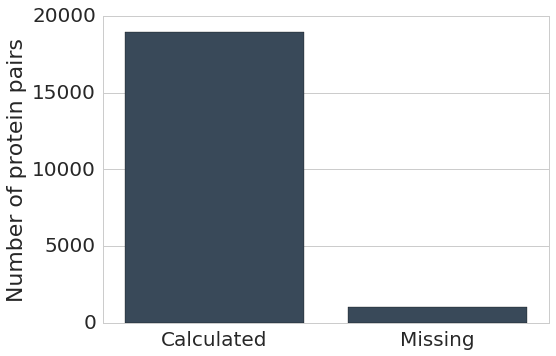

Protein HOMODIMERS excluding splice variants


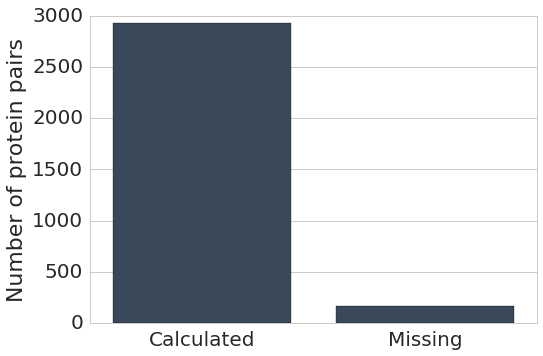

Protein HETERODIMERS excluding splice variants


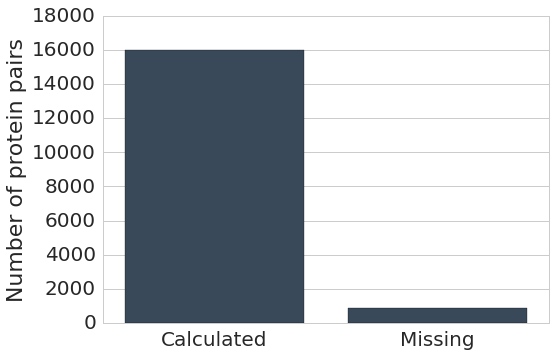

Protein HOMO- and HETERO-DIMERS excluding splice variants


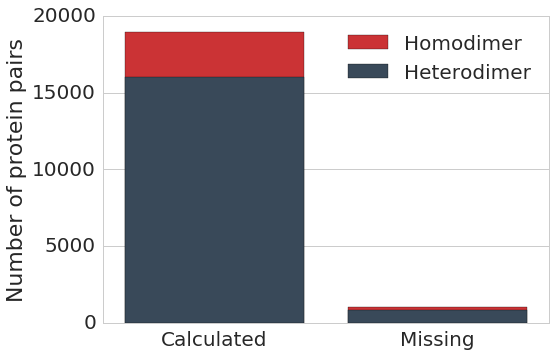

In [26]:
# Plots for protein pairs:
df = df_bak.copy()

# Prepare data
df['uniprot_id_1_canon'] = df['uniprot_id_1'].apply(lambda x: x.split('-')[0])
df['uniprot_id_2_canon'] = df['uniprot_id_2'].apply(lambda x: x.split('-')[0])

if group_by_protein_pair:
    df['unique'] = df[['uniprot_id_1', 'uniprot_id_2']].apply(lambda x: '_'.join(sorted(x)), axis=1)
else:
    df['unique'] = df['uniprot_domain_pair_id']
    
if ignore_splice_variants:
    df = df[
        (~df['uniprot_id_1'].str.contains('-')) &
        (~df['uniprot_id_2'].str.contains('-'))
    ].copy()

y_label = "Number of {} pairs".format("protein" if group_by_protein_pair else "domain")

# All dimers
print('ALL protein dimers excluding splice variants')
dimers_all = len(set(df['unique']))
dimers_with_model = len(set(df[~pd.isnull(df['model_filename'])]['unique']))
dimers_without_model = dimers_all - dimers_with_model

fg, ax = plt.subplots()
sns.barplot(
    x=['Calculated', 'Missing'],
    y=[dimers_with_model, dimers_without_model],
    color=flatui[5],
    ax=ax,
)
ax.set_ylabel(y_label)
plt.show()

# Homodimers
print('Protein HOMODIMERS excluding splice variants')
df_homo = df[
    df['uniprot_id_1_canon'] == df['uniprot_id_2_canon']
]
homodimers_all = len(set(df_homo['unique']))
homodimers_with_model = len(set(df_homo[~pd.isnull(df_homo['model_filename'])]['unique']))
homodimers_without_model = homodimers_all - homodimers_with_model

fg, ax = plt.subplots()
sns.barplot(
    x=['Calculated', 'Missing'],
    y=[homodimers_with_model, homodimers_without_model],
    color=flatui[5],
    ax=ax,
)
ax.set_ylabel(y_label)
plt.show()


# Heterodimers
print('Protein HETERODIMERS excluding splice variants')
df_hetero = df[
    df['uniprot_id_1_canon'] != df['uniprot_id_2_canon']
]
heterodimers_all = len(set(df_hetero['unique']))
heterodimers_with_model = len(set(df_hetero[~pd.isnull(df_hetero['model_filename'])]['unique']))
heterodimers_without_model = heterodimers_all - heterodimers_with_model

fg, ax = plt.subplots()
sns.barplot(
    x=['Calculated', 'Missing'],
    y=[heterodimers_with_model, heterodimers_without_model],
    color=flatui[5],
    ax=ax,
)
ax.set_ylabel(y_label)
plt.show()


# Stacked Homo- and Hetero-dimer
print('Protein HOMO- and HETERO-DIMERS excluding splice variants')
fg, ax = plt.subplots()
sns.barplot(
    x=['Calculated', 'Missing'],
    y=[dimers_with_model, dimers_without_model],
    color=sns.color_palette("Set1", 9)[0],
    ax=ax,
    label='Homodimer',
)
sns.barplot(
    x=['Calculated', 'Missing'],
    y=[heterodimers_with_model, heterodimers_without_model],
    color=flatui[5],
    ax=ax,
    label='Heterodimer',
)
ax.set_ylabel(y_label)
ax.legend(loc='upper right' if dimers_with_model > dimers_without_model else 'upper left')
plt.savefig(
    op.join(NOTEBOOK_NAME, 'missing_model_{}_pair_{}.pdf').format(
        'protein' if group_by_protein_pair else 'domain',
        'novarsplice' if ignore_splice_variants else 'varsplice',
    ), bbox_inches='tight')
plt.savefig(
    op.join(NOTEBOOK_NAME, 'missing_model_{}_pair_{}.png').format(
        'protein' if group_by_protein_pair else 'domain',
        'novarsplice' if ignore_splice_variants else 'varsplice',
    ), dpi=150, bbox_inches='tight')
plt.show()


assert len(df) == (len(df_homo) + len(df_hetero))

In [35]:
dimers_with_model + dimers_without_model, dimers_with_model, dimers_without_model, \
dimers_with_model / (dimers_with_model + dimers_without_model)

(19964, 18956, 1008, 0.9495091164095372)

## DOMAIN PAIR: missing model

In [27]:
comment_in_splice_variants = ''  # {'', '--'}

In [28]:
# Domain pairs with models
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_domain_pair_id) domain_pairs_with_models
FROM elaspic.uniprot_domain_pair dp
JOIN elaspic.uniprot_domain_pair_template dpt USING (uniprot_domain_pair_id)
JOIN elaspic.uniprot_domain d1 ON (d1.uniprot_domain_id = dp.uniprot_domain_id_1)
JOIN elaspic.uniprot_domain d2 ON (d2.uniprot_domain_id = dp.uniprot_domain_id_2)
JOIN uniprot_kb.uniprot_sequence us ON (us.uniprot_id = d1.uniprot_id)
LEFT JOIN elaspic.uniprot_domain_pair_model USING (uniprot_domain_pair_id)
WHERE organism_name = 'Homo sapiens'
{0} AND d1.uniprot_id NOT LIKE '%%-%%'
{0} AND d2.uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
AND model_filename IS NOT NULL;
# 43134""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
domain_pairs_with_models = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(domain_pairs_with_models)

43137


In [29]:
# Domain pairs without models
sql_query = r"""
SELECT COUNT(DISTINCT uniprot_domain_pair_id) domain_pairs_without_models
FROM elaspic.uniprot_domain_pair dp
JOIN elaspic.uniprot_domain_pair_template dpt USING (uniprot_domain_pair_id)
JOIN elaspic.uniprot_domain d1 ON (d1.uniprot_domain_id = dp.uniprot_domain_id_1)
JOIN elaspic.uniprot_domain d2 ON (d2.uniprot_domain_id = dp.uniprot_domain_id_2)
JOIN uniprot_kb.uniprot_sequence us ON (us.uniprot_id = d1.uniprot_id)
LEFT JOIN elaspic.uniprot_domain_pair_model USING (uniprot_domain_pair_id)
WHERE organism_name = 'Homo sapiens'
{0} AND d1.uniprot_id NOT LIKE '%%-%%'
{0} AND d2.uniprot_id NOT LIKE '%%-%%'
{1} AND db = 'sp'
AND model_filename IS NULL;
# 7169""".format(comment_in_splice_variants, comment_in_trembl)
print_sql(sql_query)
domain_pairs_without_models = int(pd.read_sql_query(sql_query, db_remote.engine).values)
print(domain_pairs_without_models)

7166


Uniprot domain pairs excluding splice variants


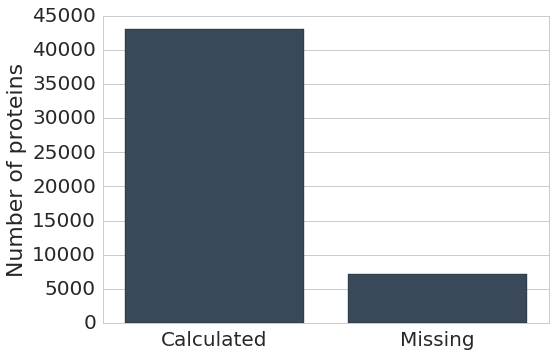

In [30]:
# Plot
print("Uniprot domain pairs {} splice variants".format(
    "including" if comment_in_splice_variants else "excluding"))
fg, ax = plt.subplots()
sns.barplot(
    x=['Calculated', 'Missing'],
    y=[domain_pairs_with_models, domain_pairs_without_models],
    color=flatui[5],
    ax=ax,
)
ax.set_ylabel('Number of proteins')
plt.show()

# **To calculate**

In [31]:
# Missing proteins and interactions
sql_query = r"""
SELECT DISTINCT d1.uniprot_id, count(distinct uniprot_domain_pair_id) number_of_interactions
FROM elaspic.uniprot_domain_pair dp
JOIN elaspic.uniprot_domain_pair_template dpt USING (uniprot_domain_pair_id)
JOIN elaspic.uniprot_domain d1 ON (d1.uniprot_domain_id = dp.uniprot_domain_id_1)
JOIN elaspic.uniprot_domain d2 ON (d2.uniprot_domain_id = dp.uniprot_domain_id_2)
JOIN uniprot_kb.uniprot_sequence us ON (us.uniprot_id = d1.uniprot_id)
WHERE organism_name = 'Homo sapiens'
-- AND d1.uniprot_id NOT LIKE '%%-%%'
-- AND d2.uniprot_id NOT LIKE '%%-%%'
AND uniprot_domain_pair_id NOT IN (
    SELECT uniprot_domain_pair_id
    FROM elaspic.uniprot_domain_pair_model
    WHERE model_filename IS NOT NULL
) group by d1.uniprot_id;
# Number of rows: 2858"""
uniprot_domain_pair_model = pd.read_sql_query(sql_query, db_remote.engine)
print_sql(sql_query)
display(uniprot_domain_pair_model.head())
print('Number of rows:', len(uniprot_domain_pair_model))

,uniprot_id,number_of_interactions
0,A0AVT1,1
1,A1A4E9,1
2,A2RUF7,2
3,A5PKW4-2,1
4,A5YKK6-3,1


Number of rows: 2853


In [32]:
# Amino acids mediating interactions
con = db_remote.engine.connect()
con.begin()
con.execute("set sql_mode = ''")
con.execute("set session group_concat_max_len = 100000000;")

sql_query = r"""
-- set sql_mode = '';
-- set session group_concat_max_len = 1000000;

select uniprot_id, uniprot_sequence, group_concat(interacting_aa) interacting_aa_all
from (
    select d1.uniprot_id uniprot_id, dm.interacting_aa_1 interacting_aa
    from elaspic.uniprot_domain_pair dp
    join elaspic.uniprot_domain_pair_model dm using (uniprot_domain_pair_id)
    join elaspic.uniprot_domain d1 on (d1.uniprot_domain_id = dp.uniprot_domain_id_1)
    where uniprot_id not like '%%-%%'
        union
    select d2.uniprot_id uniprot_id, dm.interacting_aa_2 interacting_aa
    from elaspic.uniprot_domain_pair dp
    join elaspic.uniprot_domain_pair_model dm using (uniprot_domain_pair_id)
    join elaspic.uniprot_domain d2 on (d2.uniprot_domain_id = dp.uniprot_domain_id_2)
    where uniprot_id not like '%%-%%'
) t1
join uniprot_kb.uniprot_sequence using (uniprot_id)
where organism_name = 'Homo sapiens' AND db = 'sp'
group by uniprot_id, uniprot_sequence;
"""
print_sql(sql_query)
interacting_aa_df = pd.read_sql_query(sql_query, con)
display(interacting_aa_df.head())
print('Number of rows:', len(interacting_aa_df))

con.close()

,uniprot_id,uniprot_sequence,interacting_aa_all
0,A0A5B9,DLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFYPDHVELSWWV...,"10,11,12,13,14,15,16,18,19,22,23,25,27,28,29,3..."
1,A0AV96,MTAEDSTAAMSSDSAAGSSAKVPEGVAGAPNEAALLALMERTGYSM...,"258,259,260,263,273,274,275,281,289,258,259,26..."
2,A0AVT1,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,"575,579,601,603,615,616,617,618,624,625,628,62..."
3,A0FGR8,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,"824,826,828,831,832,833,834,835,838,861,863,86..."
4,A0FGR9,MRAEEPCAPGAPSALGAQRTPGPELRLSSQLLPELCTFVVRVLFYL...,"792,794,798,799,800,801,802,803,806,808,829,83..."


Number of rows: 5538
